In [1]:
import sys
sys.path.append("..")

import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from reader import generic_reader

In [2]:
df_movies = generic_reader.read_csv_file_to_data_frame("movie_data/movies_prepared.csv")
df_persons = generic_reader.read_csv_file_to_data_frame("movie_data/persons_prepared.csv")

## Lead actor/actress age and gender

This notebook will explode the age and gender of the lead actor/actress

Creating a new column with the main lead of the movie the index[0] of cast_person_ids and dropping cast_person_ids column

In [3]:
df_movies['cast_person_ids'] = df_movies['cast_person_ids'].apply(ast.literal_eval)

df_movies['cast_person_id'] = df_movies['cast_person_ids'].str[0].astype('Int64')

df_movies = df_movies.drop(columns=['cast_person_ids'])

print(df_movies[['cast_person_id']].head())

   cast_person_id
0            3416
1           51391
2            9778
3           13548
4           27643


Merging the two dataframes to one

In [4]:
df_merged = df_movies.merge(
    df_persons,
    left_on="cast_person_id",
    right_on="person_id",
    how="left",
    suffixes=("", "_cast")
)

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   budget               6200 non-null   int64  
 1   movie_id             6200 non-null   int64  
 2   original_title       6200 non-null   object 
 3   overview             6197 non-null   object 
 4   release_date         6200 non-null   object 
 5   revenue              6200 non-null   int64  
 6   runtime              6200 non-null   int64  
 7   vote_average         6200 non-null   float64
 8   vote_count           6200 non-null   int64  
 9   director_person_ids  6200 non-null   object 
 10  genre_ids            6200 non-null   object 
 11  collection_id        1153 non-null   float64
 12  cast_credit_ids      6200 non-null   object 
 13  crew_person_ids      6200 non-null   object 
 14  crew_credit_ids      6200 non-null   object 
 15  budget_2023_usd      6200 non-null   i

Removing actors/actresses whose age at the movie’s release is greater than 100, based on the assumption that their date of death is missing

In [5]:
df_merged['release_date'] = pd.to_datetime(df_merged['release_date'])
df_merged['birthday'] = pd.to_datetime(df_merged['birthday'])

df_merged['age_at_release'] = df_merged.apply(
    lambda row: row['release_date'].year - row['birthday'].year - 
                ((row['release_date'].month, row['release_date'].day) < (row['birthday'].month, row['birthday'].day)),
    axis=1
)

df_merged = df_merged[df_merged['age_at_release'].notna() & (df_merged['age_at_release'] <= 100)]

df_merged[['original_title', 'release_date', 'birthday', 'age_at_release']].head()


,original_title,release_date,birthday,age_at_release
0,Passion of Mind,2000-01-07,1962-11-11,37.0
1,My Dog Skip,2000-01-12,1985-12-05,14.0
2,Next Friday,2000-01-12,1969-06-15,30.0
3,Supernova,2000-01-14,1960-02-07,39.0
4,From Dusk Till Dawn 3: The Hangman's Daughter,2000-01-18,1971-11-14,28.0


In [6]:
df_merged.describe().round(2)

,budget,movie_id,release_date,revenue,runtime,vote_average,vote_count,collection_id,budget_2023_usd,revenue_2023_usd,cast_person_id,birthday,gender,person_id,age_at_release
count,5.705000e+03,5705.00,5705,5.705000e+03,5705.00,5705.00,5705.00,1093.00,5.705000e+03,5.705000e+03,5705.0,5705,5705.00,5705.00,5705.00
mean,2.805419e+07,180824.45,2011-05-05 07:33:19.719544320,6.861268e+07,103.47,5.93,1959.00,335382.20,3.856106e+07,9.360047e+07,164181.87,1972-05-15 06:35:46.748466256,1.69,164181.87,38.47
min,1.000000e+00,22.00,2000-01-07 00:00:00,0.000000e+00,60.00,1.80,10.00,10.00,1.000000e+00,0.000000e+00,2.0,1917-03-23 00:00:00,0.00,2.00,5.00
25%,3.000000e+06,14137.00,2006-06-16 00:00:00,0.000000e+00,91.00,5.31,95.00,86115.00,4.140905e+06,0.000000e+00,4512.0,1964-01-07 00:00:00,1.00,4512.00,28.00
50%,1.200000e+07,59006.00,2011-03-18 00:00:00,7.022728e+06,100.00,6.08,574.00,201576.00,1.676830e+07,9.906578e+06,18999.0,1972-11-08 00:00:00,2.00,18999.00,37.00
75%,3.500000e+07,310307.00,2016-03-09 00:00:00,6.440000e+07,112.00,6.64,2174.00,525891.00,4.680716e+07,9.057565e+07,72466.0,1982-04-16 00:00:00,2.00,72466.00,47.00
max,5.839000e+08,1160164.00,2023-12-25 00:00:00,2.923706e+09,219.00,9.40,38021.00,1553427.00,6.079353e+08,4.152467e+09,4659347.0,2010-05-04 00:00:00,3.00,4659347.00,91.00
std,4.304182e+07,223593.87,NaN,1.682972e+08,17.36,1.05,3554.81,348307.05,5.681688e+07,2.207423e+08,416789.76,NaN,0.47,416789.76,13.72


In [7]:
zero_revenue_count = (df_merged['revenue_2023_usd'] == 0).sum()
print(f"Rows with revenue = 0: {zero_revenue_count}")

df_merged = df_merged[df_merged['revenue_2023_usd'] != 0].copy()
print(f"Remaining rows after removing revenue = 0: {len(df_merged)}")

Rows with revenue = 0: 1733
Remaining rows after removing revenue = 0: 3972


In [8]:
df_merged = df_merged[df_merged['gender'].isin([1, 2, 3])]

df_merged['gender_filled'] = df_merged['gender'].astype(int)

gender_labels = {1: "Female", 2: "Male", 3: "Non-binary"}
df_merged['gender_label'] = df_merged['gender_filled'].map(gender_labels)

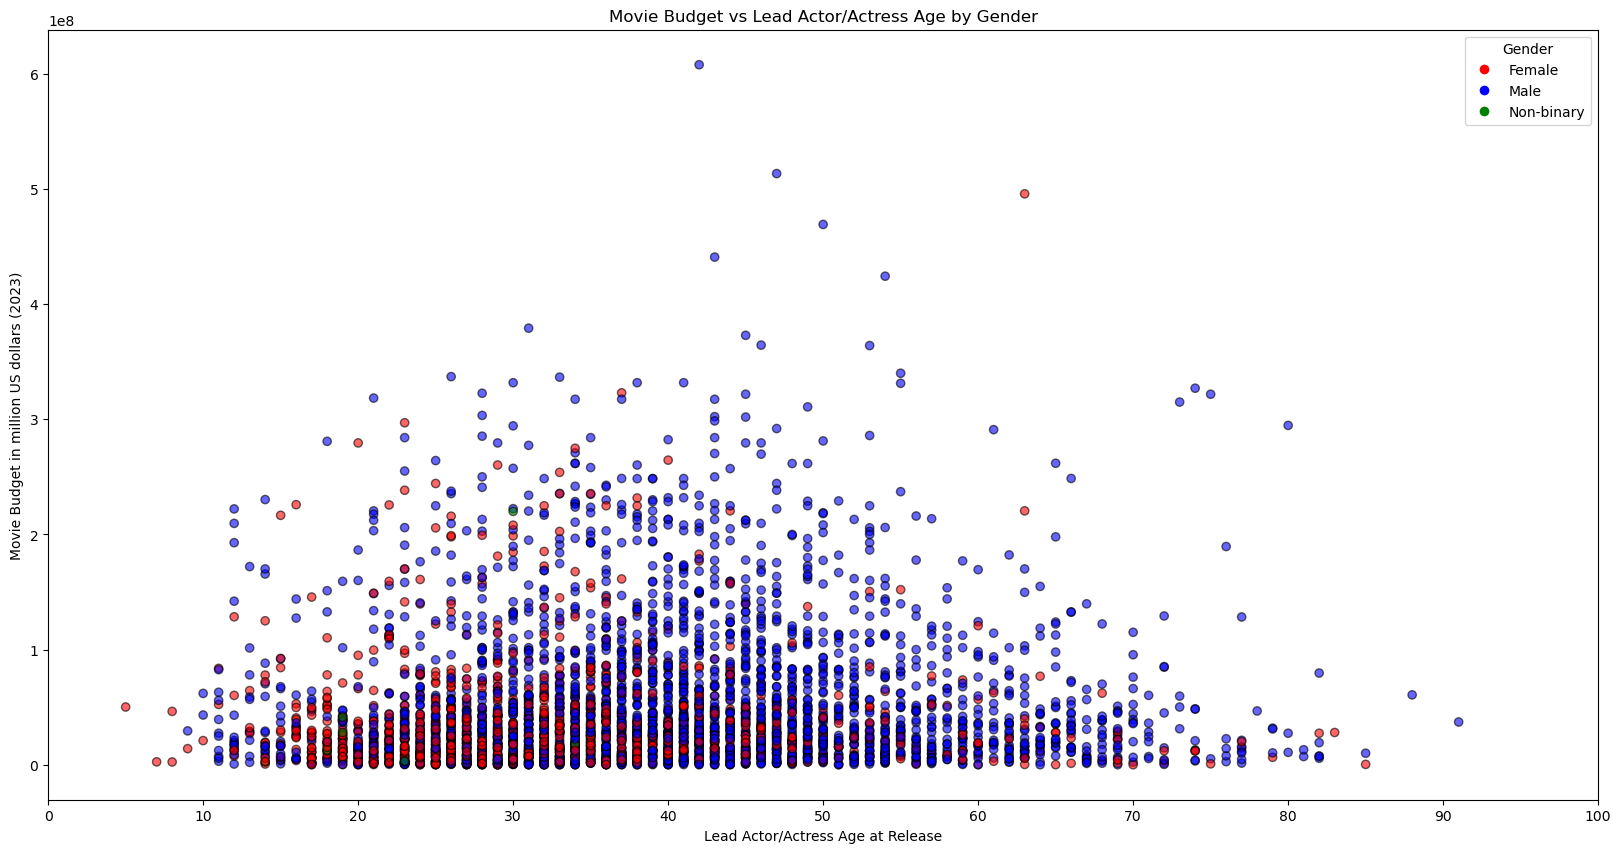

In [9]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

gender_colors = {"Female": "red", "Male": "blue", "Non-binary": "green"}
df_merged['color'] = df_merged['gender_label'].map(gender_colors)

plt.figure(figsize=(20, 10))
plt.scatter(
    df_merged['age_at_release'],
    df_merged['budget_2023_usd'],
    c=df_merged['color'],
    alpha=0.6,
    edgecolor='k'
)

plt.xlabel("Lead Actor/Actress Age at Release")
plt.ylabel("Movie Budget in million US dollars (2023)")
plt.title("Movie Budget vs Lead Actor/Actress Age by Gender")

# Set x-axis steps
plt.xticks(range(0, int(df_merged['age_at_release'].max()) + 10, 10))

# Infobox
unique_labels = df_merged['gender_label'].unique()

legend_elements = [
    Line2D([0], [0], marker='o', color='w',
           label=label,
           markerfacecolor=gender_colors[label],
           markersize=8)
    for label in unique_labels
]


plt.legend(handles=legend_elements, title="Gender")
plt.show()

The hypothesis at the beginning of the project was that female actors was more successful (with success defined as being the lead actor or actress in a movie) while under the age of 40, whereas male actors would be more succesful after the age of 40.
This dataset includes 1,178 actresses and 2,779 actors, covering an age range from 5 to 91.

Looking at the age range 18-40, we find that actresses have 844 leading roles, representing 71,65% of all female leading roles, while actors have had 1351 leading roles which is 48,61% of all male leading roles.
When we include actresses and actors below the age of 18, the numbers increase to 915 leading roles for actresses and 1434 actors changing the proportions to 77,67% for females and 51,6% for males.

Looking at the age range from 41-91, we find 1345 male leading roles and 265 female leading roles, corresponding to 48,40% of all male leading roles and 22,33% of all female leading roles.

Focusing specifically on the age range 20-30, we find that females have 449 leading roles (38,12%) while males have 505 leading roles (18,17%) of the total.
From the age 30-40, males have 881 lead roles (31,7%) and females have 384 (32,60%).


Based on our dataset of movies from January 1, 2000, and December 31, 2023 with a minimum of 10 votes and considering only the lead role, we can conclude that our hypothesis holds true for female actor, they tend to find more succes in their younger years. However, male actors do not follow the hypothesis and find roughly equal success before and after 40.

Overall, the data shows a clear age-related decline in leading roles for women after the age of 40, whereas men maintain a relatively steady rate of leading roles throughout their careers.

Export the merged dataframe to be use in the streamlit apps

In [10]:
df_merged.to_csv("movie_data/to_streamlit.csv", index=False)